# Exploratory Data Analysis on Stroke Risk Factors Using Python

### Objective:

- ##### To analyze healthcare data in finding key factors contributing to stroke risk and provide data-driven recommendations for prevention and management

### Tools Used:

- ##### Python (Pandas, NumPy, Matplotlip, Seaborn)
- ##### Jupyter Notebook

### Project Steps:
##### 1. Data Collection & Overview
##### 2. Data Cleaning & Transformation
##### 3. Exploratory Data Analysis (EDA)
##### 4. Insights & Recommendations
##### 5. Conclusion

### 1. Data Collection & Overview

In [2]:
#Importing libraries for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset

df = pd.read_csv(r"C:\Users\user\Documents\Emmanuel's Projects\Python_Projects\healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
#inspecting the dataset structure and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#converting age from float to integer for readability

df = df.astype(
    {
        'age': 'int'
    }
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int32  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 459.2+ KB


In [6]:
#basic descriptive statistics

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#checking first few rows

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Notes:**
- ##### Datasets contains patient level health data with attributes like age, BMI, glucose level and hypertension

### 2. Data Cleaning & Transformation

In [8]:
#Renaming columns for consistent formatting and easier reference

df.rename(
    columns=
    {
        'Residence_type':'residence_type',
        'bmi':'BMI',
        'avg_glucose_level':'glucose_level',
        'ever_married':'married'
    }
,inplace=True)

df.head() 

,id,gender,age,hypertension,heart_disease,married,work_type,residence_type,glucose_level,BMI,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
#checking unique categories across categorical variables.

name_of_cols = ['gender','married','work_type','residence_type','smoking_status']
for i in name_of_cols:
    print(i, ":", df[i].unique(), "\n")

gender : ['Male' 'Female' 'Other'] 

married : ['Yes' 'No'] 

work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] 

residence_type : ['Urban' 'Rural'] 

smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown'] 



In [10]:
#inspecting the value counts for gender

df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [11]:
#inspecting value counts for work_type

df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [12]:
#checking for null values

df.isnull().sum()

id                  0
gender              0
age                 0
hypertension        0
heart_disease       0
married             0
work_type           0
residence_type      0
glucose_level       0
BMI               201
smoking_status      0
stroke              0
dtype: int64

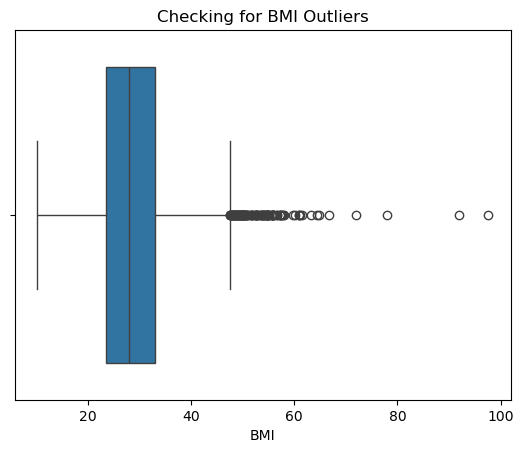

In [13]:
#checking for outliers in BMI

sns.boxplot(x=df['BMI'])
plt.title('Checking for BMI Outliers')
plt.xlabel('BMI')
plt.show()

In [14]:
#Missing BMI values were filled using the meidan of the column

df['BMI'] = df['BMI'].fillna(df['BMI'].median())

df.isnull().sum()

id                0
gender            0
age               0
hypertension      0
heart_disease     0
married           0
work_type         0
residence_type    0
glucose_level     0
BMI               0
smoking_status    0
stroke            0
dtype: int64

**Notes:**
- ##### Renamed columns like Residence_type to lowercase for consistency, checked for nulls & missing values and as well filled missing BMI values with the median after checking for outliers.

### 3. Exploratory Data Analysis(EDA)

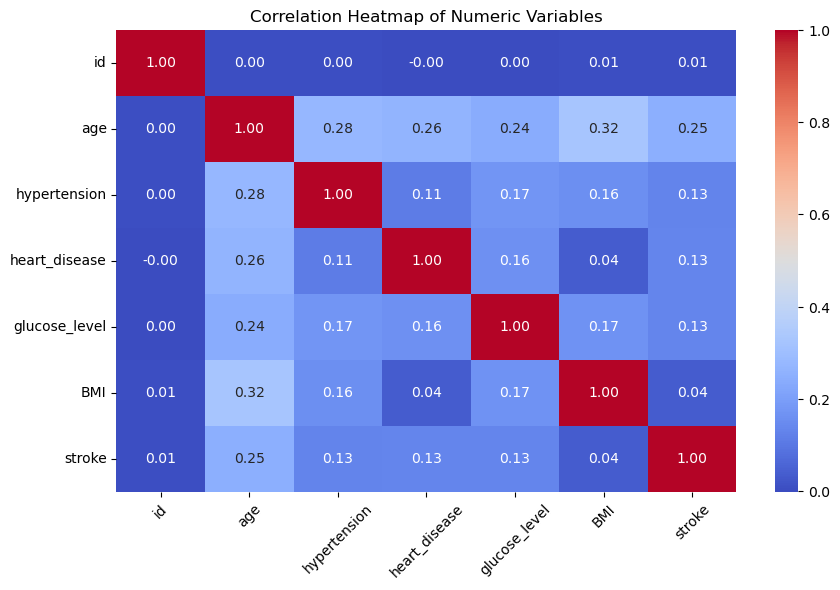

In [15]:
#Heat map to shows corr between Num vars

plt.figure(figsize = (10, 6))
sns.heatmap(data = df.corr(numeric_only = True), annot = True, cmap ='coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.xticks(rotation = 45)
plt.show()

##### The heatmap shows the strength of relationships among numeric features. Age, glucose level, and BMI have some correlation with stroke, while most other variables show weak relationships.

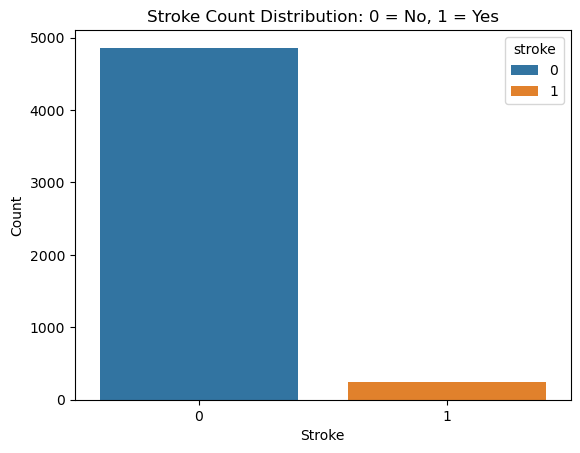

In [16]:
#Countplot of the stroke variable that shows the balance 


sns.countplot(data = df, x = 'stroke', hue = 'stroke')
plt.title('Stroke Count Distribution: 0 = No, 1 = Yes')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

##### The dataset is highly imbalanced, most patients did not experience a stroke (0), while only a small fraction did (1).

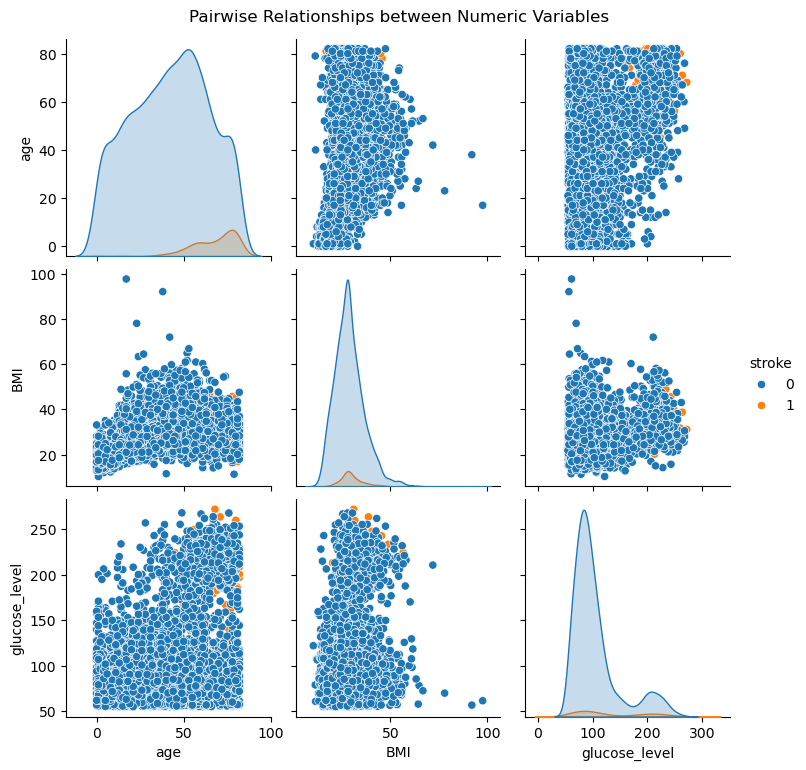

In [17]:
#Pairplot to shows the relationship between Num vars

sns.pairplot(df, vars = ['age', 'BMI', 'glucose_level'], hue = 'stroke')
plt.suptitle('Pairwise Relationships between Numeric Variables', y = 1.02)
plt.show()

##### Displays pairwise relationships among age, BMI, and glucose level, with stroke outcomes highlighted. Stroke cases tend to cluster at higher age and glucose levels

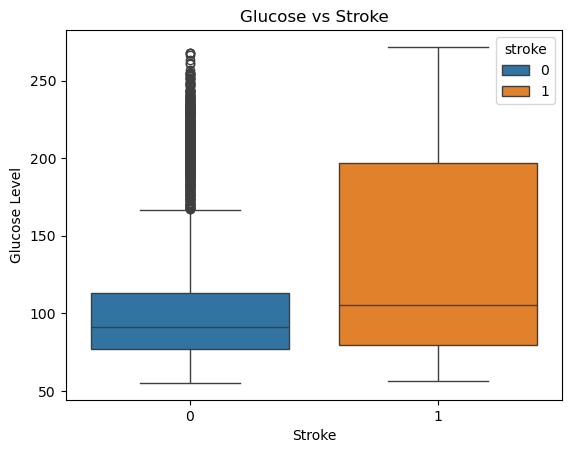

In [18]:
#Boxplot to compares glucose_level vs stroke

sns.boxplot(data = df, x = 'stroke', y = 'glucose_level', hue = 'stroke')
plt.title('Glucose vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Glucose Level')
plt.show()

##### Stroke patients generally show higher average glucose levels compared to non-stroke patients.

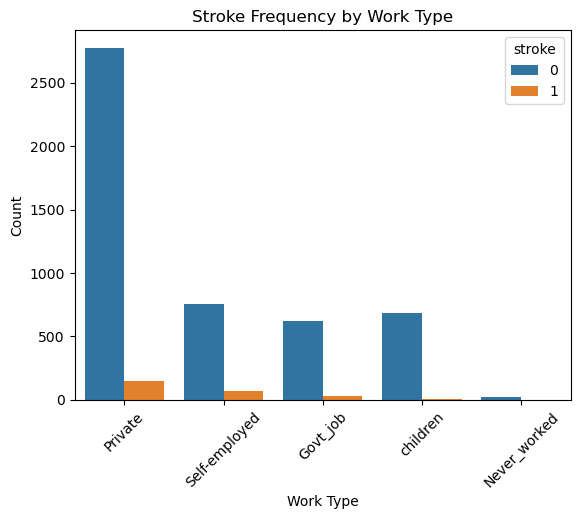

In [19]:
#To shows the relationship between stroke occuerence by work type

sns.countplot(data = df, x = 'work_type', hue = 'stroke')
plt.xticks(rotation = 45)
plt.title('Stroke Frequency by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

##### Private-sector employees form the largest group overall, but stroke incidence is relatively higher among self-employed individuals. This may suggest occupational or lifestyle influences.

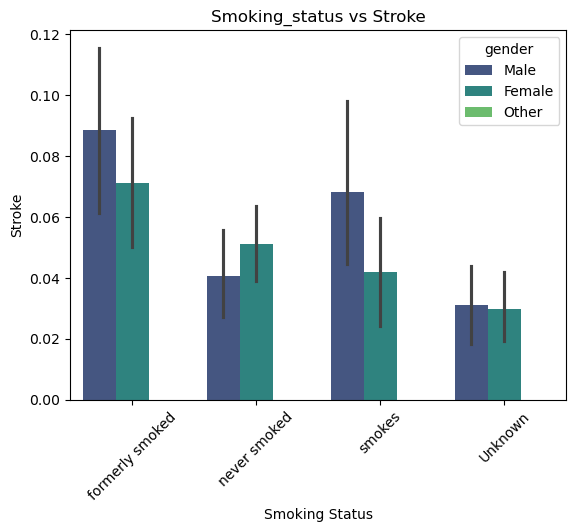

In [20]:
#The barplot shows the relationship between smoking habit and stroke occurrence.

sns.barplot(data = df, x = 'smoking_status', y = 'stroke', palette = 'viridis', hue = 'gender')
plt.xticks(rotation = 45)
plt.title('Smoking_status vs Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Stroke')
plt.show()

##### Former smokers show the highest stroke proportion overall. Among smokers, males tend to have slightly higher stroke rates than females, while among non-smokers, females show a marginally higher rate than males.

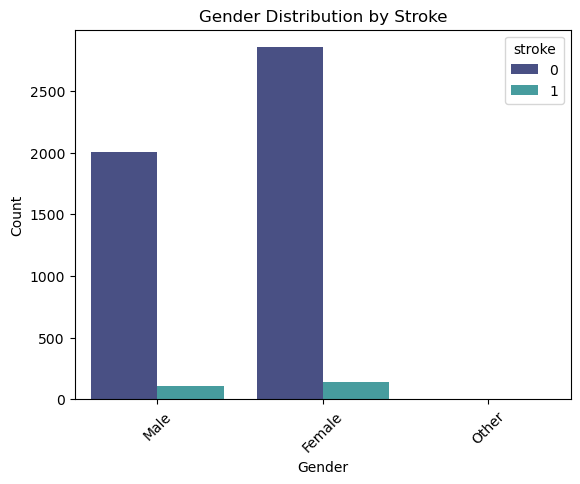

In [21]:
#The countplot shows gender distribution by stroke

sns.countplot(data = df, x = 'gender', hue = 'stroke', palette = 'mako')
plt.xticks(rotation = 45)
plt.title('Gender Distribution by Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##### Stroke occurrences appear relatively similar across genders, indicating gender alone may not be a strong predictor.

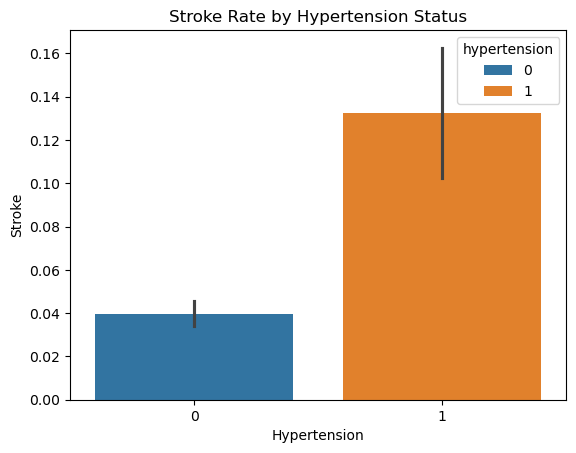

hypertension
0    0.039679
1    0.132530
Name: stroke, dtype: float64

In [22]:
#To show stroke rate vs hypertension

sns.barplot(data = df, x = 'hypertension', y = 'stroke', hue = 'hypertension')
plt.title('Stroke Rate by Hypertension Status')
plt.xlabel('Hypertension')
plt.ylabel('Stroke')
plt.show()

df.groupby('hypertension')['stroke'].mean()

##### Individuals with hypertension have a higher likelihood of stroke compared to those without hypertension.

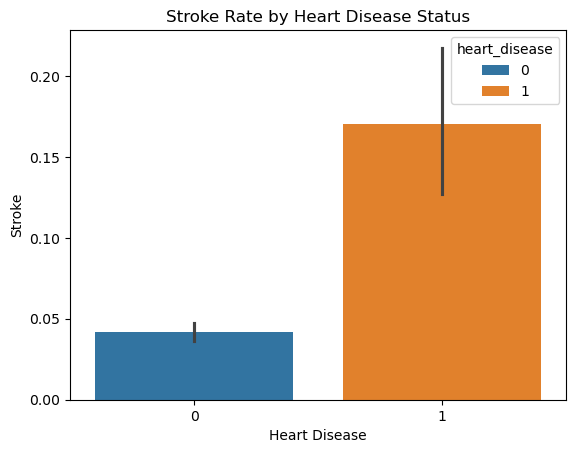

heart_disease
0    0.041787
1    0.170290
Name: stroke, dtype: float64

In [23]:
#To show stroke rate vs heart disease

sns.barplot(data = df, x = 'heart_disease', y = 'stroke', hue = 'heart_disease')
plt.title('Stroke Rate by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Stroke')
plt.show()

df.groupby('heart_disease')['stroke'].mean()

##### Stroke occurrence is more frequent among patients with heart disease than those without it.

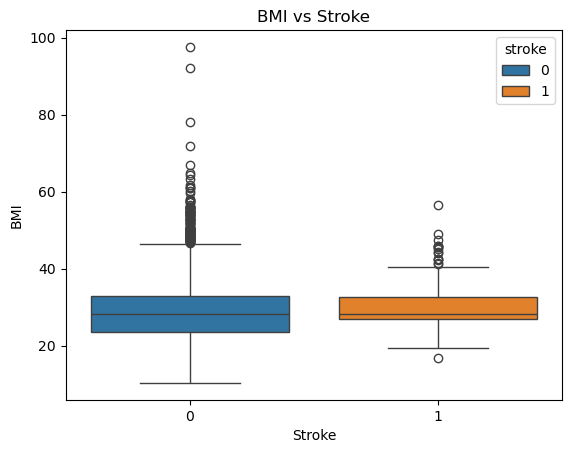

In [24]:
#To show how BMI varies among stroke and non-stroke patients.

sns.boxplot(data = df, x = 'stroke', y = 'BMI', hue = 'stroke')
plt.title('BMI vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

##### The average BMI is higher for stroke patients, but the range and extreme outliers are more common among non-stroke individuals.

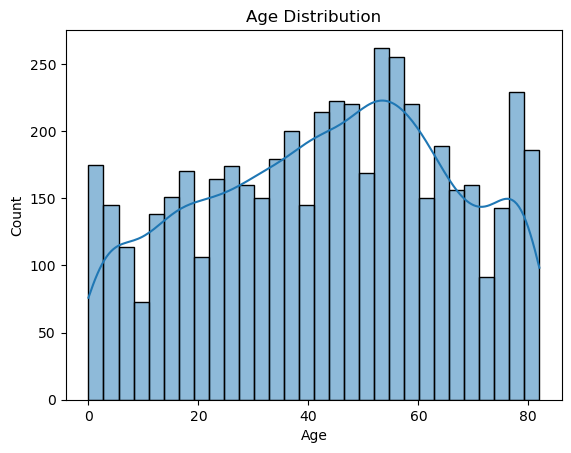

In [25]:
#The hist shows the age distribution of all patients.

sns.histplot(data = df, x = 'age', bins = 30, kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### Most patients are younger adults, but stroke cases are concentrated among older individuals.

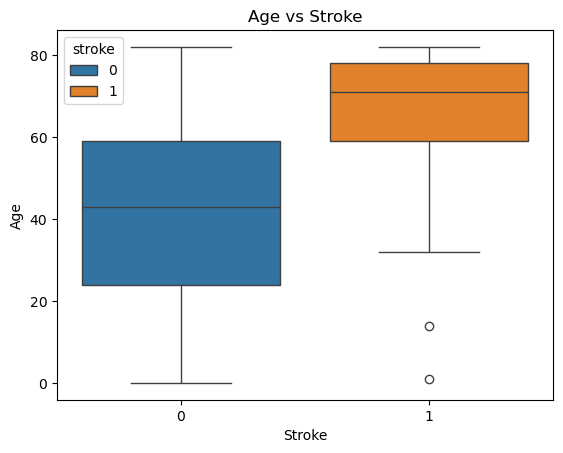

In [26]:
#To show the relationship between age and stroke occurrence.

sns.boxplot(data = df, x = 'stroke', y = 'age', hue = 'stroke')
plt.title('Age vs Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

##### The likelihood of stroke increases significantly with age; older patients are at much higher risk.

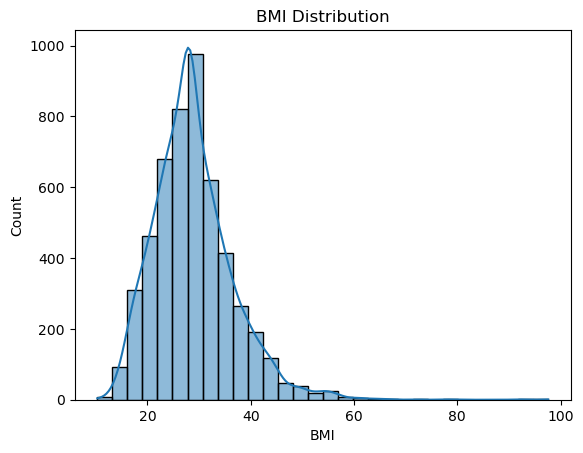

In [27]:
#To shows the distribution of BMI across all individuals in the dataset.

sns.histplot(data = df, x = 'BMI', bins = 30, kde = True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

##### BMI follows an approximately bell-shaped (normal) distribution, centered around 25–35, but with a few patients showing unusually high BMI values, suggesting mild outliers.

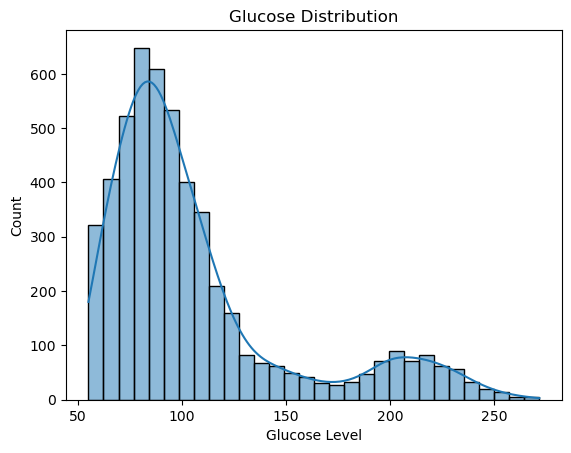

In [28]:
#This shows the spread of glucose levels among all patients.

sns.histplot(data = df, x = 'glucose_level', bins = 30, kde = True)
plt.title('Glucose Distribution')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.show()

##### Glucose levels are right-skewed, with a subset of patients having notably high glucose readings

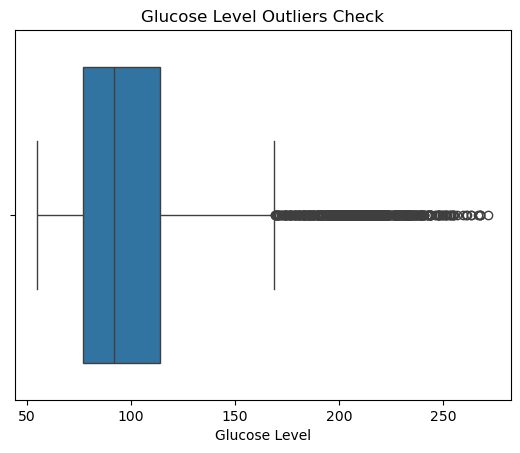

In [29]:
#Glucose level above 180 are potential outliers and could represent diabetic patients are prone to stroke

sns.boxplot(data = df, x = 'glucose_level')
plt.title('Glucose Level Outliers Check')
plt.xlabel('Glucose Level')
plt.show()

##### The boxplot confirms the presence of several outliers in glucose levels, likely representing individuals with hyperglycemia or diabetic conditions, which could increase stroke risk.

### 4. Insights & Recommendations

**Key Insights:**
- Age plays a crucial role as stroke occurrence rises sharply among older individuals, indicating that age is a strong risk factor.

- Hypertension and heart disease show a noticeable increase in stroke prevalence, suggesting cardiovascular conditions are key predictors.

- Glucose levels tend to be higher among stroke patients, and several extreme values may represent diabetic or pre-diabetic individuals prone to stroke.

- BMI shows a mild upward trend among stroke patients but with overlapping ranges, implying that obesity may contribute but is not a sole determinant.

- Smoking status indicates that former smokers and current smokers experience higher stroke rates compared to non-smokers, with subtle gender differences (males slightly higher in the smoker group).

- Work type suggests that while private-sector workers dominate the dataset, stroke rates appear proportionally higher among self-employed individuals, possibly linked to stress or lifestyle factors.

- Gender shows no significant difference overall, implying stroke risk may be more influenced by medical and lifestyle factors than sex.


**Recomendations:**
- Implement targeted health campaigns for individuals with hypertension, heart disease, and high glucose levels.

- Encourage regular medical screenings for blood pressure, glucose, and BMI, especially in middle-aged and older adults.

- Promote smoking cessation programs and continued follow-up support for former smokers.

- Introduce workplace wellness programs, particularly for self-employed individuals focusing on stress management and preventive care.

- Collect more granular data (e.g., diet, physical activity, stress, genetic history) to strengthen future analysis and understanding of stroke risk factors.

### 5. Conclusion
- This exploratory analysis provided valuable insights into the key factors associated with stroke risk. Age, glucose level, and the presence of hypertension or heart disease showed noticeable influence on stroke occurrence, while lifestyle factors such as smoking and work type also contributed subtle effects. Overall, the findings highlight the importance of monitoring cardiovascular and metabolic indicators in preventive healthcare strategies.